In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import keras
from keras import Sequential
from keras.models import Sequential
from keras.optimizers import SGD,Adam,Adagrad
from keras.layers import InputLayer, Dense 
%matplotlib inline

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score,KFold
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# https://www.kaggle.com/aliounediop/randomforest-92-and-neuralnetwork-81


In [2]:
df=pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
print("Mushrooms dataset dimensions : {}".format(df.shape))

Mushrooms dataset dimensions : (768, 9)


In [14]:
df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [15]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

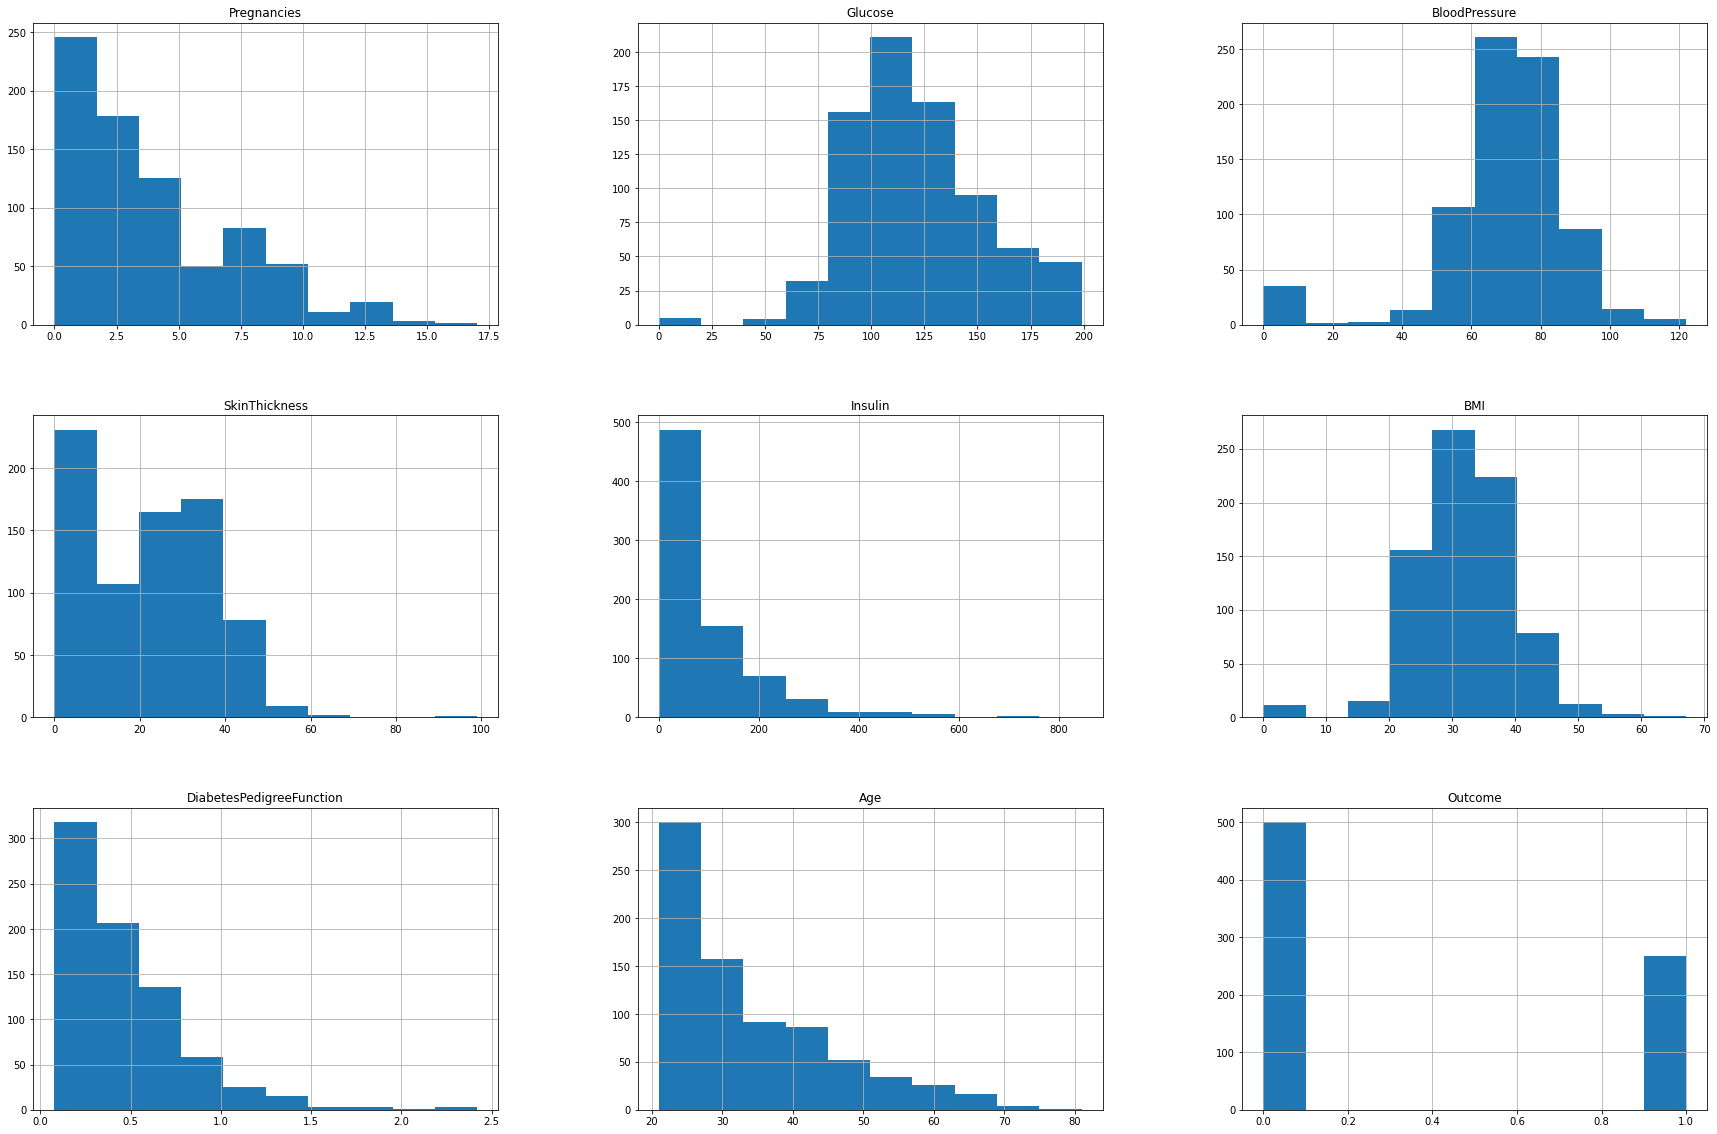

In [16]:
#Plotting the variables using histogram
# df.hist(figsize=(30,20))

In [17]:
#Checking for missing values
# df.isna().sum()

In [18]:
#split dataset into features and label
X = df.drop(columns=['Outcome'])
# X = X.drop(columns = ['veil-type'])
y = df['Outcome']
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [19]:
#Replacing the zero-values for Blood Pressure
import statistics
df1 = df.loc[df['Outcome'] == 1]
df2 = df.loc[df['Outcome'] == 0]
df1 = df1.replace({'BloodPressure':0}, 80)
print(statistics.mode(df1['BloodPressure']))
df2 = df2.replace({'BloodPressure':0}, np.median(df2['BloodPressure']))
print(statistics.median(df2['BloodPressure']))
dataframe = [df1, df2]
df = pd.concat(dataframe)

80
70.0


In [20]:
#Replacing the zero-values for BMI
df1 = df.loc[df['Outcome'] == 1]
df2 = df.loc[df['Outcome'] == 0]
df1 = df1.replace({'BMI':0}, np.mean(df1['BMI']))
print(np.mean(df1['BMI']))
df2 = df2.replace({'BMI':0}, 21.7)

dataframe = [df1, df2]
df = pd.concat(dataframe)

35.40479505457787


In [21]:
#Replacing the zero-values for Glucose
df1 = df.loc[df['Outcome'] == 1]
df2 = df.loc[df['Outcome'] == 0]
df1 = df1.replace({'Glucose':0}, np.median(df1['Glucose']))
print(np.median(df1['Glucose']))
df2 = df2.replace({'Glucose':0}, 100)
print(np.median(df2['Glucose']))
dataframe = [df1, df2]
df = pd.concat(dataframe)

140.0
107.0


In [22]:
#Replacing the zero-values for Insulin
df1 = df.loc[df['Outcome'] == 1]
df2 = df.loc[df['Outcome'] == 0]
df1 = df1.replace({'Insulin':0}, np.mean(df1['Insulin']))
print(np.mean(df1['Insulin']))
df2 = df2.replace({'Insulin':0}, np.mean(df2['Insulin']))
print(np.mean(df2['Insulin']))
dataframe = [df1, df2]
df = pd.concat(dataframe)

152.00128090888842
101.261824


In [23]:
#Replacing the zero-values for SkinThickness
df1 = df.loc[df['Outcome'] == 1]
df2 = df.loc[df['Outcome'] == 0]
df1 = df1.replace({'SkinThickness':0}, np.median(df1['SkinThickness']))
df2 = df2.replace({'SkinThickness':0}, np.median(df2['SkinThickness']))
dataframe = [df1, df2]
df = pd.concat(dataframe)

In [24]:
print("Number of Outliners - BloodPressure: ", df[df.BloodPressure == 0].shape[0])
print("Number of Outliners - BMI: ", df[df.BMI == 0].shape[0])
print("Number of Outliners - Glucose: ", df[df.Glucose == 0].shape[0])
print("Number of Outliners - Insulin: ", df[df.Insulin == 0].shape[0])
print("Number of Outliners - SkinThickness: ", df[df.SkinThickness == 0].shape[0])

Number of Outliners - BloodPressure:  0
Number of Outliners - BMI:  0
Number of Outliners - Glucose:  0
Number of Outliners - Insulin:  0
Number of Outliners - SkinThickness:  0


In [25]:
 # 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#What is random_state?

In [26]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [27]:
#Feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
X_train

array([[-0.8362943 , -0.80005088, -0.53576428, ..., -1.06015343,
        -0.61421636, -0.94861028],
       [ 0.39072767, -0.49054341,  0.12804365, ...,  0.64646721,
        -0.90973787, -0.43466673],
       [-1.14304979,  0.43797901, -0.09322566, ...,  1.35537117,
        -0.30699103, -0.77729576],
       ...,
       [ 1.92450513, -0.6143464 ,  0.90248622, ...,  1.78859026,
         1.94892066,  0.42190587],
       [-1.14304979,  0.62368349, -3.8548039 , ...,  1.36849903,
        -0.77514391, -0.34900947],
       [-1.14304979,  0.12847154,  1.45565949, ..., -1.24394334,
        -0.60836445, -1.03426754]])

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [30]:
X_train

array([[-1.70610079, -0.85479702],
       [ 0.92739508, -0.89986165],
       [ 1.37933242, -2.21617369],
       ...,
       [ 2.00256675,  0.59115341],
       [-1.86928208, -0.87142956],
       [-1.41806314,  0.07977445]])

In [31]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [32]:
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_val_score(classifier, X_train, y_train, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))
        res = cross_val_score(classifier, X_train, y_train, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))

In [33]:
# Create Decision Tree classifer object
classifier = DecisionTreeClassifier(criterion='entropy')
# Train Decision Tree Classifer
classifier = classifier.fit(X_train,y_train)

In [34]:
#Predict the response for test dataset
y_pred = classifier.predict(X_test)
# Model Accuracy, how often is the classifier correct?
DTAccuracy = metrics.accuracy_score(y_test, y_pred)
print("DT Test Accuracy:", DTAccuracy)

DT Test Accuracy: 0.6147186147186147


In [35]:
def visualization_train(model):
    sns.set_context(context='notebook',font_scale=2)
    plt.figure(figsize=(16,9))
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.6, cmap = ListedColormap(('#ff3f34', '#3c40c6')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('#ff3f34', '#3c40c6'))(i), label = j)
    plt.title("%s Training Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()
    
def visualization_test(model):
    sns.set_context(context='notebook',font_scale=2)
    plt.figure(figsize=(16,9))
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.6, cmap = ListedColormap(('#ff3f34', '#3c40c6')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('#ff3f34', '#3c40c6'))(i), label = j)
    plt.title("%s Test Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()

In [36]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       349
           1       1.00      1.00      1.00       188

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537


Confusion Matrix:
[[349   0]
 [  0 188]]

Average Accuracy:	0.6704

Standard Deviation:	0.0470


In [37]:
# visualization_train('Decision Tree')

In [38]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.6147

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       151
           1       0.44      0.41      0.43        80

    accuracy                           0.61       231
   macro avg       0.57      0.57      0.57       231
weighted avg       0.61      0.61      0.61       231


Confusion Matrix:
[[109  42]
 [ 47  33]]

Average Accuracy:	0.6834

Standard Deviation:	0.0418


In [39]:
# visualization_test('Decision Tree')

In [40]:
from sklearn.model_selection import learning_curve
# from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit

In [41]:
# train_sizes, train_scores, valid_scores = learning_curve(SVC(kernel='linear'), X, y, train_sizes=[0.6, 0.7, 0.8], cv=5)

In [45]:
test_scores = []
train_scores = []

# how to determine the 15?
for i in range(1, 20):

    clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = i)
    clf.fit(X_train,y_train)
    
    train_scores.append(clf.score(X_train,y_train))
    test_scores.append(clf.score(X_test,y_test))

In [46]:
print(test_scores)

[0.6883116883116883, 0.6883116883116883, 0.6796536796536796, 0.6406926406926406, 0.6277056277056277, 0.6363636363636364, 0.6320346320346321, 0.6320346320346321, 0.6060606060606061, 0.6103896103896104, 0.6536796536796536, 0.6320346320346321, 0.6666666666666666, 0.6363636363636364, 0.6753246753246753, 0.6363636363636364, 0.6536796536796536, 0.645021645021645, 0.6190476190476191]


In [47]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and max_depth = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 97.57914338919925 % and max_depth = [18]


In [48]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and max_depth = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))
k=list(map(lambda x: x+1, test_scores_ind))[0]
print(k)

Max test score 68.83116883116884 % and max_depth = [1, 2]
1


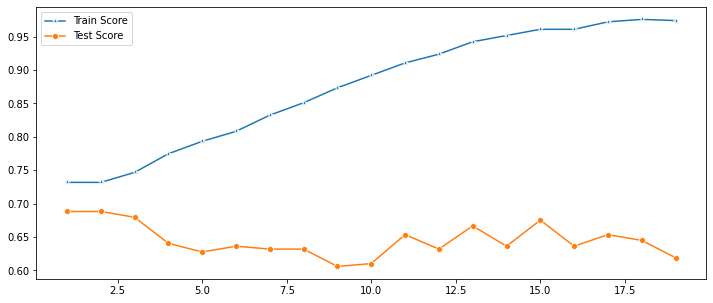

In [49]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,20),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,20),test_scores,marker='o',label='Test Score')

In [50]:
###NEURAL NETWORK MLP
#https://scikit-learn.org/stable/modules/neural_networks_supervised.html#classification
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


# X, y = make_classification(n_samples=100, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=42)


In [51]:
#Add classifier and fit the data
classifier = MLPClassifier(solver = 'sgd', hidden_layer_sizes=(100,),random_state=42, activation = 'logistic', max_iter=500)
classifier.fit(X_train, y_train)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', max_iter=500, random_state=42,
              solver='sgd')

In [52]:
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [53]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.7076

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.97      0.81       349
           1       0.78      0.23      0.35       188

    accuracy                           0.71       537
   macro avg       0.74      0.60      0.58       537
weighted avg       0.73      0.71      0.65       537


Confusion Matrix:
[[337  12]
 [145  43]]

Average Accuracy:	0.7188

Standard Deviation:	0.0159


In [54]:
# visualization_train('MLP')

In [55]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.6926

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.93      0.80       151
           1       0.65      0.25      0.36        80

    accuracy                           0.69       231
   macro avg       0.67      0.59      0.58       231
weighted avg       0.68      0.69      0.65       231


Confusion Matrix:
[[140  11]
 [ 60  20]]

Average Accuracy:	0.7188

Standard Deviation:	0.0159


In [56]:
# visualization_test('MLP')

In [57]:
#Predict the response for test dataset
y_pred = classifier.predict(X_test)
# Model Accuracy, how often is the classifier correct?
MLPAccuracy = metrics.accuracy_score(y_test, y_pred)
print("MPL Test Accuracy:", MLPAccuracy)

MPL Test Accuracy: 0.6926406926406926



learning on dataset bruises
training: learning-rate 0.005 logistic


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Testing set score: 0.653680
Testing set loss: 0.604557
training: learning-rate 0.008


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Testing set score: 0.688312
Testing set loss: 0.577712
training: learning-rate 0.01


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Testing set score: 0.696970
Testing set loss: 0.562809
training: learning-rate 0.05
Testing set score: 0.701299
Testing set loss: 0.528597
training: learning-rate 0.1
Testing set score: 0.696970
Testing set loss: 0.529542

learning on dataset cap-surface
training: learning-rate 0.005 logistic


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Testing set score: 0.653680
Testing set loss: 0.604557
training: learning-rate 0.008


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Testing set score: 0.688312
Testing set loss: 0.577712
training: learning-rate 0.01


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Testing set score: 0.696970
Testing set loss: 0.562809
training: learning-rate 0.05
Testing set score: 0.701299
Testing set loss: 0.528597
training: learning-rate 0.1
Testing set score: 0.696970
Testing set loss: 0.529542

learning on dataset gill-attachment
training: learning-rate 0.005 logistic


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Testing set score: 0.653680
Testing set loss: 0.604557
training: learning-rate 0.008


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Testing set score: 0.688312
Testing set loss: 0.577712
training: learning-rate 0.01


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Testing set score: 0.696970
Testing set loss: 0.562809
training: learning-rate 0.05
Testing set score: 0.701299
Testing set loss: 0.528597
training: learning-rate 0.1
Testing set score: 0.696970
Testing set loss: 0.529542


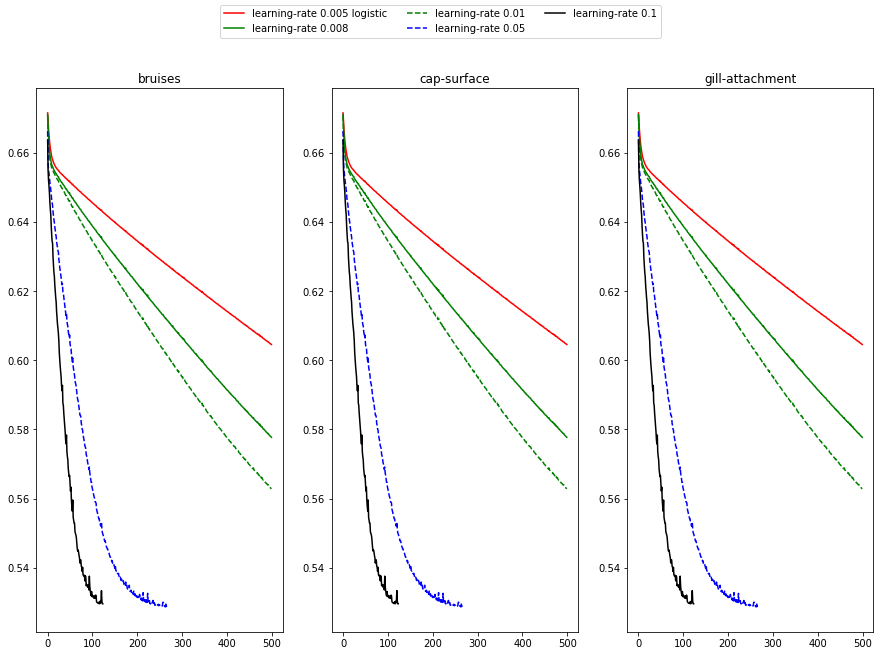

In [58]:
# import warnings

import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.exceptions import ConvergenceWarning

# different learning rate schedules and momentum parameters

params = [{'solver': 'sgd', 'learning_rate': 'constant','activation': 'logistic', 'momentum': 0, 'hidden_layer_sizes':(100,),
           'learning_rate_init': 0.005},
          {'solver': 'sgd', 'learning_rate': 'constant', 'activation': 'logistic', 'momentum': 0,'hidden_layer_sizes':(100,),
           'learning_rate_init': 0.008},
          {'solver': 'sgd', 'learning_rate': 'constant','activation': 'logistic',  'momentum': 0,'hidden_layer_sizes':(100,),
           'learning_rate_init': 0.01},
          {'solver': 'sgd', 'learning_rate': 'constant','activation': 'logistic',  'momentum': 0,'hidden_layer_sizes':(100,),
           'learning_rate_init': 0.05},
          {'solver': 'sgd', 'learning_rate': 'constant','activation': 'logistic',  'momentum': 0,'hidden_layer_sizes':(100,),
           'learning_rate_init': 0.1}
         ]

labels = ["learning-rate 0.005 logistic", "learning-rate 0.008","learning-rate 0.01","learning-rate 0.05","learning-rate 0.1"
         
         ]

# The number of hidden layers
# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
#              {'c': 'blue', 'linestyle': '-'},
#              {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-'}
            ]




def plot_on_dataset(X, y, ax, name):
    # for each dataset, plot learning for each learning strategy
    print("\nlearning on dataset %s" % name)
    ax.set_title(name)

#     X = MinMaxScaler().fit_transform(X)
#fit_transform X or X test?  

    mlps = []
#     if name == "Outcome":
#         # digits is larger but converges fairly quickly
#         max_iter = 15
#     else:
    max_iter = 500

    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(random_state=42,
                            max_iter=max_iter, **param)

        # some parameter combinations will not converge as can be seen on the
        # plots so they are ignored here
#         with warnings.catch_warnings():
#             warnings.filterwarnings("ignore", category=ConvergenceWarning,
#                                     module="sklearn")
        mlp.fit(X_train, y_train)

        mlps.append(mlp)
        print("Testing set score: %f" % mlp.score(X_test, y_test))
        print("Testing set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
        ax.plot(mlp.loss_curve_, label=label, **args)


fig, axes = plt.subplots(1, 3, figsize=(15, 10))


# load / generate some toy datasets
# iris = datasets.load_iris()
# X_digits, y_digits = datasets.load_digits(return_X_y=True)

# data_sets = [(iris.data, iris.target),
#              (X_digits, y_digits),
#              datasets.make_circles(noise=0.2, factor=0.5, random_state=42),
#              datasets.make_moons(noise=0.3, random_state=42)]

for ax, data, name in zip(axes.ravel(), df, ['bruises', 'cap-surface', 'gill-attachment']):
    plot_on_dataset(X, y, ax=ax, name=name)


fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
plt.show()

In [59]:
# scores=cross_val_score(model,X,y,cv=cv,verbose=0)
# score.mean()

In [60]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier as KNN
classifier = KNN()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [61]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.7952

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       349
           1       0.74      0.63      0.68       188

    accuracy                           0.80       537
   macro avg       0.78      0.76      0.77       537
weighted avg       0.79      0.80      0.79       537


Confusion Matrix:
[[308  41]
 [ 69 119]]

Average Accuracy:	0.6964

Standard Deviation:	0.0233


In [62]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)


Test results:

Accuracy Score: 0.6753

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       151
           1       0.54      0.45      0.49        80

    accuracy                           0.68       231
   macro avg       0.63      0.62      0.63       231
weighted avg       0.66      0.68      0.67       231


Confusion Matrix:
[[120  31]
 [ 44  36]]

Average Accuracy:	0.6964

Standard Deviation:	0.0233


In [63]:
test_scores = []
train_scores = []

# how to determine the 15?
for i in range(1,20):

    knn = KNN(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [64]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [65]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))
k=list(map(lambda x: x+1, test_scores_ind))[0]
print(k)

Max test score 71.86147186147186 % and k = [14]
14


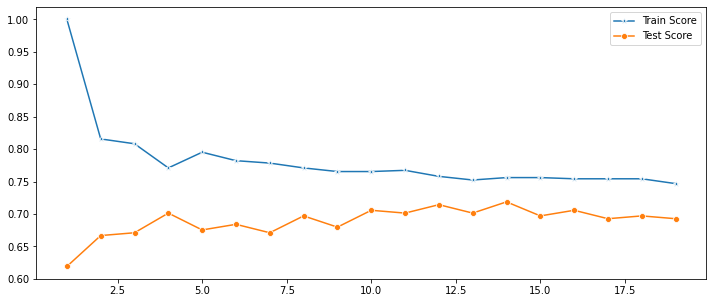

In [66]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,20),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,20),test_scores,marker='o',label='Test Score')

In [67]:
classifier = KNN(k)

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
KNNAccuracy = metrics.accuracy_score(y_test, y_pred)

print("KNN Test Accuracy:", KNNAccuracy)

KNN Test Accuracy: 0.7186147186147186


In [68]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.7561

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       349
           1       0.71      0.51      0.59       188

    accuracy                           0.76       537
   macro avg       0.74      0.70      0.71       537
weighted avg       0.75      0.76      0.74       537


Confusion Matrix:
[[311  38]
 [ 93  95]]

Average Accuracy:	0.7207

Standard Deviation:	0.0242


In [69]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.7186

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       151
           1       0.62      0.49      0.55        80

    accuracy                           0.72       231
   macro avg       0.69      0.66      0.67       231
weighted avg       0.71      0.72      0.71       231


Confusion Matrix:
[[127  24]
 [ 41  39]]

Average Accuracy:	0.7207

Standard Deviation:	0.0242


In [70]:
# visualization_train('K-NN')

In [71]:
# visualization_test('K-NN')


In [72]:
# # ROC-AUC 
# # ROC (Receiver Operating Characteristic) Curve tells us about how good the model can distinguish between two things (e.g If a patient has a disease or no). Better models can accurately distinguish between the two. Whereas, a poor model will have difficulties in distinguishing between the two

# # Well Explained in this video: https://www.youtube.com/watch?v=OAl6eAyP-yo

# from sklearn.metrics import roc_curve
# y_pred_proba = knn.predict_proba(X_test)[:,1]
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [73]:
#Ensemble Learning - Boosting
# https://towardsdatascience.com/ensemble-learning-using-scikit-learn-85c4531ff86a

# https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier

# seed = 7
num_trees = 100
kfold = model_selection.KFold(n_splits=10, random_state=42,shuffle=True)
classifier = GradientBoostingClassifier(random_state=42, learning_rate = 0.1)
# results = model_selection.cross_val_score(classifier, X, y, cv=kfold)
# print(results)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
EAccuracy = metrics.accuracy_score(y_test, y_pred)

print("Ensemble Test Accuracy:", EAccuracy)

Ensemble Test Accuracy: 0.6536796536796536


In [74]:
# print(results.mean())

In [75]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.8641

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       349
           1       0.88      0.71      0.79       188

    accuracy                           0.86       537
   macro avg       0.87      0.83      0.84       537
weighted avg       0.87      0.86      0.86       537


Confusion Matrix:
[[330  19]
 [ 54 134]]

Average Accuracy:	0.7317

Standard Deviation:	0.0360


In [76]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.6537

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       151
           1       0.50      0.45      0.47        80

    accuracy                           0.65       231
   macro avg       0.61      0.61      0.61       231
weighted avg       0.65      0.65      0.65       231


Confusion Matrix:
[[115  36]
 [ 44  36]]

Average Accuracy:	0.7317

Standard Deviation:	0.0360


In [77]:
# visualization_train('Ensemble')

In [78]:
# visualization_test('Ensemble')

In [79]:
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier()
classifier.fit(X_train, y_train)


AdaBoostClassifier()

In [80]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Training results:

Accuracy Score: 0.7952

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       349
           1       0.78      0.58      0.66       188

    accuracy                           0.80       537
   macro avg       0.79      0.75      0.76       537
weighted avg       0.79      0.80      0.79       537


Confusion Matrix:
[[318  31]
 [ 79 109]]

Average Accuracy:	0.7262

Standard Deviation:	0.0274
Test results:

Accuracy Score: 0.6710

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.81      0.76       151
           1       0.53      0.41      0.46        80

    accuracy                           0.67       231
   macro avg       0.63      0.61      0.61       231
weighted avg       0.66      0.67      0.66       231


Confusion Matrix:
[[122  29]
 [ 47  33]]

Average Accuracy:	0.7262

Standard Deviation:	0.0274


In [115]:
test_scores = []
train_scores = []


for i in [100, 110, 120, 130, 140, 150, 160]:

    abc = AdaBoostClassifier(n_estimators=i)
    abc.fit(X_train, y_train)
    
    train_scores.append(abc.score(X_train,y_train))
    test_scores.append(abc.score(X_test,y_test))


In [116]:
print(test_scores)

[0.6753246753246753, 0.683982683982684, 0.6883116883116883, 0.670995670995671, 0.683982683982684, 0.6796536796536796, 0.683982683982684]


In [117]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 83.79888268156425 % and k = [6, 7]


In [118]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))
k=list(map(lambda x: x+1, test_scores_ind))[0]
print(k)

Max test score 68.83116883116884 % and k = [3]
3


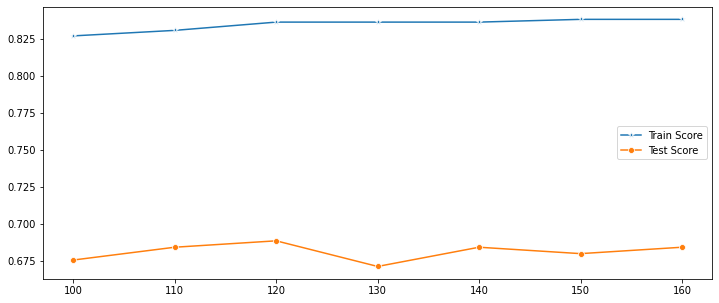

In [119]:
plt.figure(figsize=(12,5))
p = sns.lineplot([100, 110, 120, 130, 140, 150, 160],train_scores,marker='*',label='Train Score')
p = sns.lineplot([100, 110, 120, 130, 140, 150, 160],test_scores,marker='o',label='Test Score')

In [120]:
test_scores = []
train_scores = []


for i in [0.001, 0.01, 0.1, 1]:

    abc = AdaBoostClassifier(n_estimators=60, learning_rate = i)
    abc.fit(X_train, y_train)
    
    train_scores.append(abc.score(X_train,y_train))
    test_scores.append(abc.score(X_test,y_test))


In [121]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 79.88826815642457 % and k = [4]


In [123]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))
k=list(map(lambda x: x+1, test_scores_ind))[0]
print(k)

Max test score 69.6969696969697 % and k = [2]
2


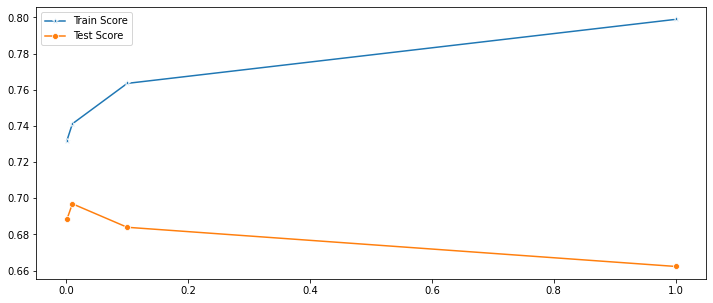

In [124]:
plt.figure(figsize=(12,5))
p = sns.lineplot([0.001, 0.01, 0.1, 1],train_scores,marker='*',label='Train Score')
p = sns.lineplot([0.001, 0.01, 0.1, 1],test_scores,marker='o',label='Test Score')

In [125]:
#SVC Classification Model rbf
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state=42)

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
SVCAccuracy = metrics.accuracy_score(y_test, y_pred)

print("SVC Test Accuracy:", SVCAccuracy)

SVC Test Accuracy: 0.70995670995671


In [126]:
for c in [0.1, 1, 10, 100, 1000]:
    classifier = SVC(kernel='rbf',random_state=42, C=c)
    classifier.fit(X_train,y_train)

In [132]:
test_scores = []
train_scores = []


for c in [0.01, 0.04, 0.07, 0.1, 1, 10]:

    classifier = SVC(kernel='rbf',random_state=42, C=c)
    classifier.fit(X_train,y_train)
    
    train_scores.append(classifier.score(X_train,y_train))
    test_scores.append(classifier.score(X_test,y_test))


In [133]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))
k=list(map(lambda x: x+1, test_scores_ind))[0]
print(k)

Max train score 74.30167597765363 % and k = [5]
Max test score 71.42857142857143 % and k = [4]
4


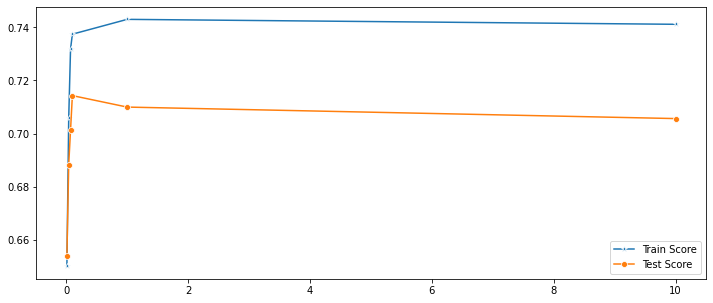

In [134]:
plt.figure(figsize=(12,5))
p = sns.lineplot([0.01, 0.04, 0.07, 0.1, 1, 10],train_scores,marker='*',label='Train Score')
p = sns.lineplot([0.01, 0.04, 0.07, 0.1, 1, 10],test_scores,marker='o',label='Test Score')

In [95]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)


Training results:

Accuracy Score: 0.7747

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       349
           1       0.72      0.59      0.65       188

    accuracy                           0.77       537
   macro avg       0.76      0.73      0.74       537
weighted avg       0.77      0.77      0.77       537


Confusion Matrix:
[[305  44]
 [ 77 111]]

Average Accuracy:	0.7187

Standard Deviation:	0.0268


In [96]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.6797

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.80      0.77       151
           1       0.55      0.45      0.49        80

    accuracy                           0.68       231
   macro avg       0.64      0.63      0.63       231
weighted avg       0.67      0.68      0.67       231


Confusion Matrix:
[[121  30]
 [ 44  36]]

Average Accuracy:	0.7187

Standard Deviation:	0.0268


In [97]:
# visualization_train('SVC')

In [98]:
# visualization_test('SVC')

In [135]:
#SVC Classification Model sigmoid
from sklearn.svm import SVC
classifier = SVC(kernel='sigmoid',random_state=42)

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
SVCAccuracy_s = metrics.accuracy_score(y_test, y_pred)

print("SVC (Sigmoid) Test Accuracy:", SVCAccuracy_s)

SVC (Sigmoid) Test Accuracy: 0.6363636363636364


In [136]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Training results:

Accuracy Score: 0.6462

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       349
           1       0.49      0.48      0.49       188

    accuracy                           0.65       537
   macro avg       0.61      0.61      0.61       537
weighted avg       0.64      0.65      0.64       537


Confusion Matrix:
[[257  92]
 [ 98  90]]

Average Accuracy:	0.6537

Standard Deviation:	0.0306
Test results:

Accuracy Score: 0.6364

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       151
           1       0.47      0.42      0.45        80

    accuracy                           0.64       231
   macro avg       0.59      0.59      0.59       231
weighted avg       0.63      0.64      0.63       231


Confusion Matrix:
[[113  38]
 [ 46  34]]

Average Accuracy:	0.6537

Standard Deviation:	0.0306


In [137]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Training results:

Accuracy Score: 0.6462

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       349
           1       0.49      0.48      0.49       188

    accuracy                           0.65       537
   macro avg       0.61      0.61      0.61       537
weighted avg       0.64      0.65      0.64       537


Confusion Matrix:
[[257  92]
 [ 98  90]]

Average Accuracy:	0.6537

Standard Deviation:	0.0306
Test results:

Accuracy Score: 0.6364

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       151
           1       0.47      0.42      0.45        80

    accuracy                           0.64       231
   macro avg       0.59      0.59      0.59       231
weighted avg       0.63      0.64      0.63       231


Confusion Matrix:
[[113  38]
 [ 46  34]]

Average Accuracy:	0.6537

Standard Deviation:	0.0306


In [138]:
#SVC Classification Model Linear
from sklearn.svm import SVC
classifier = SVC(kernel='linear',random_state=42)

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
SVCAccuracy_l = metrics.accuracy_score(y_test, y_pred)

print("SVC (Sigmoid) Test Accuracy:", SVCAccuracy_l)

SVC (Sigmoid) Test Accuracy: 0.7012987012987013


Text(0.5, 1.0, 'SVC kernels Prediction Accuracies Comparison')

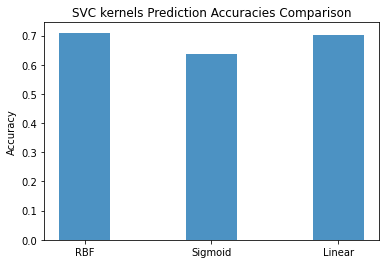

In [139]:
kernels = [SVCAccuracy, SVCAccuracy_s, SVCAccuracy_l]
kernels_label = ('RBF', 'Sigmoid', 'Linear')
y_pos = np.arange(len(kernels_label))
plt.bar(y_pos, kernels, width = 0.4, align='center', alpha=0.8)
plt.xticks(y_pos, kernels_label)
plt.ylabel('Accuracy')
plt.title('SVC kernels Prediction Accuracies Comparison')

In [140]:
print(kernels)

[0.70995670995671, 0.6363636363636364, 0.7012987012987013]


Text(0.5, 1.0, 'Prediction Accuracy Comparison')

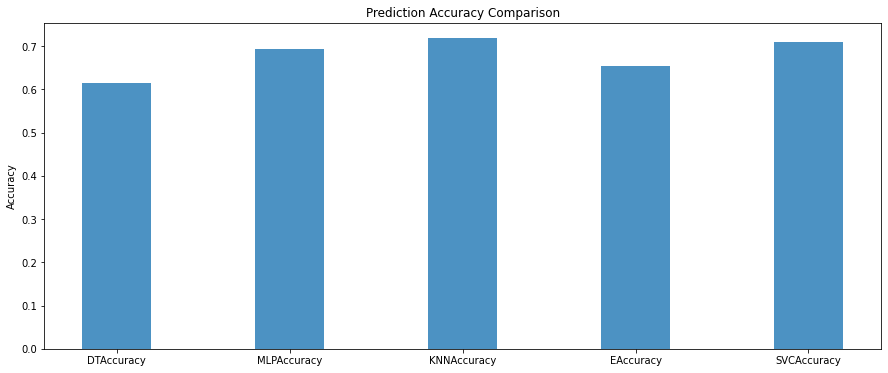

In [105]:
accuracy = [DTAccuracy, MLPAccuracy, KNNAccuracy, EAccuracy, SVCAccuracy]
plt.figure(figsize=(15,6))
x_label = ('DTAccuracy', 'MLPAccuracy', 'KNNAccuracy', 'EAccuracy', 'SVCAccuracy')
y_pos = np.arange(len(x_label))
plt.bar(y_pos, accuracy, width = 0.4, align='center', alpha=0.8)
plt.xticks(y_pos, x_label)
plt.ylabel('Accuracy')
plt.title('Prediction Accuracy Comparison')

In [106]:
print(accuracy)

[0.6147186147186147, 0.6926406926406926, 0.7186147186147186, 0.6536796536796536, 0.70995670995671]


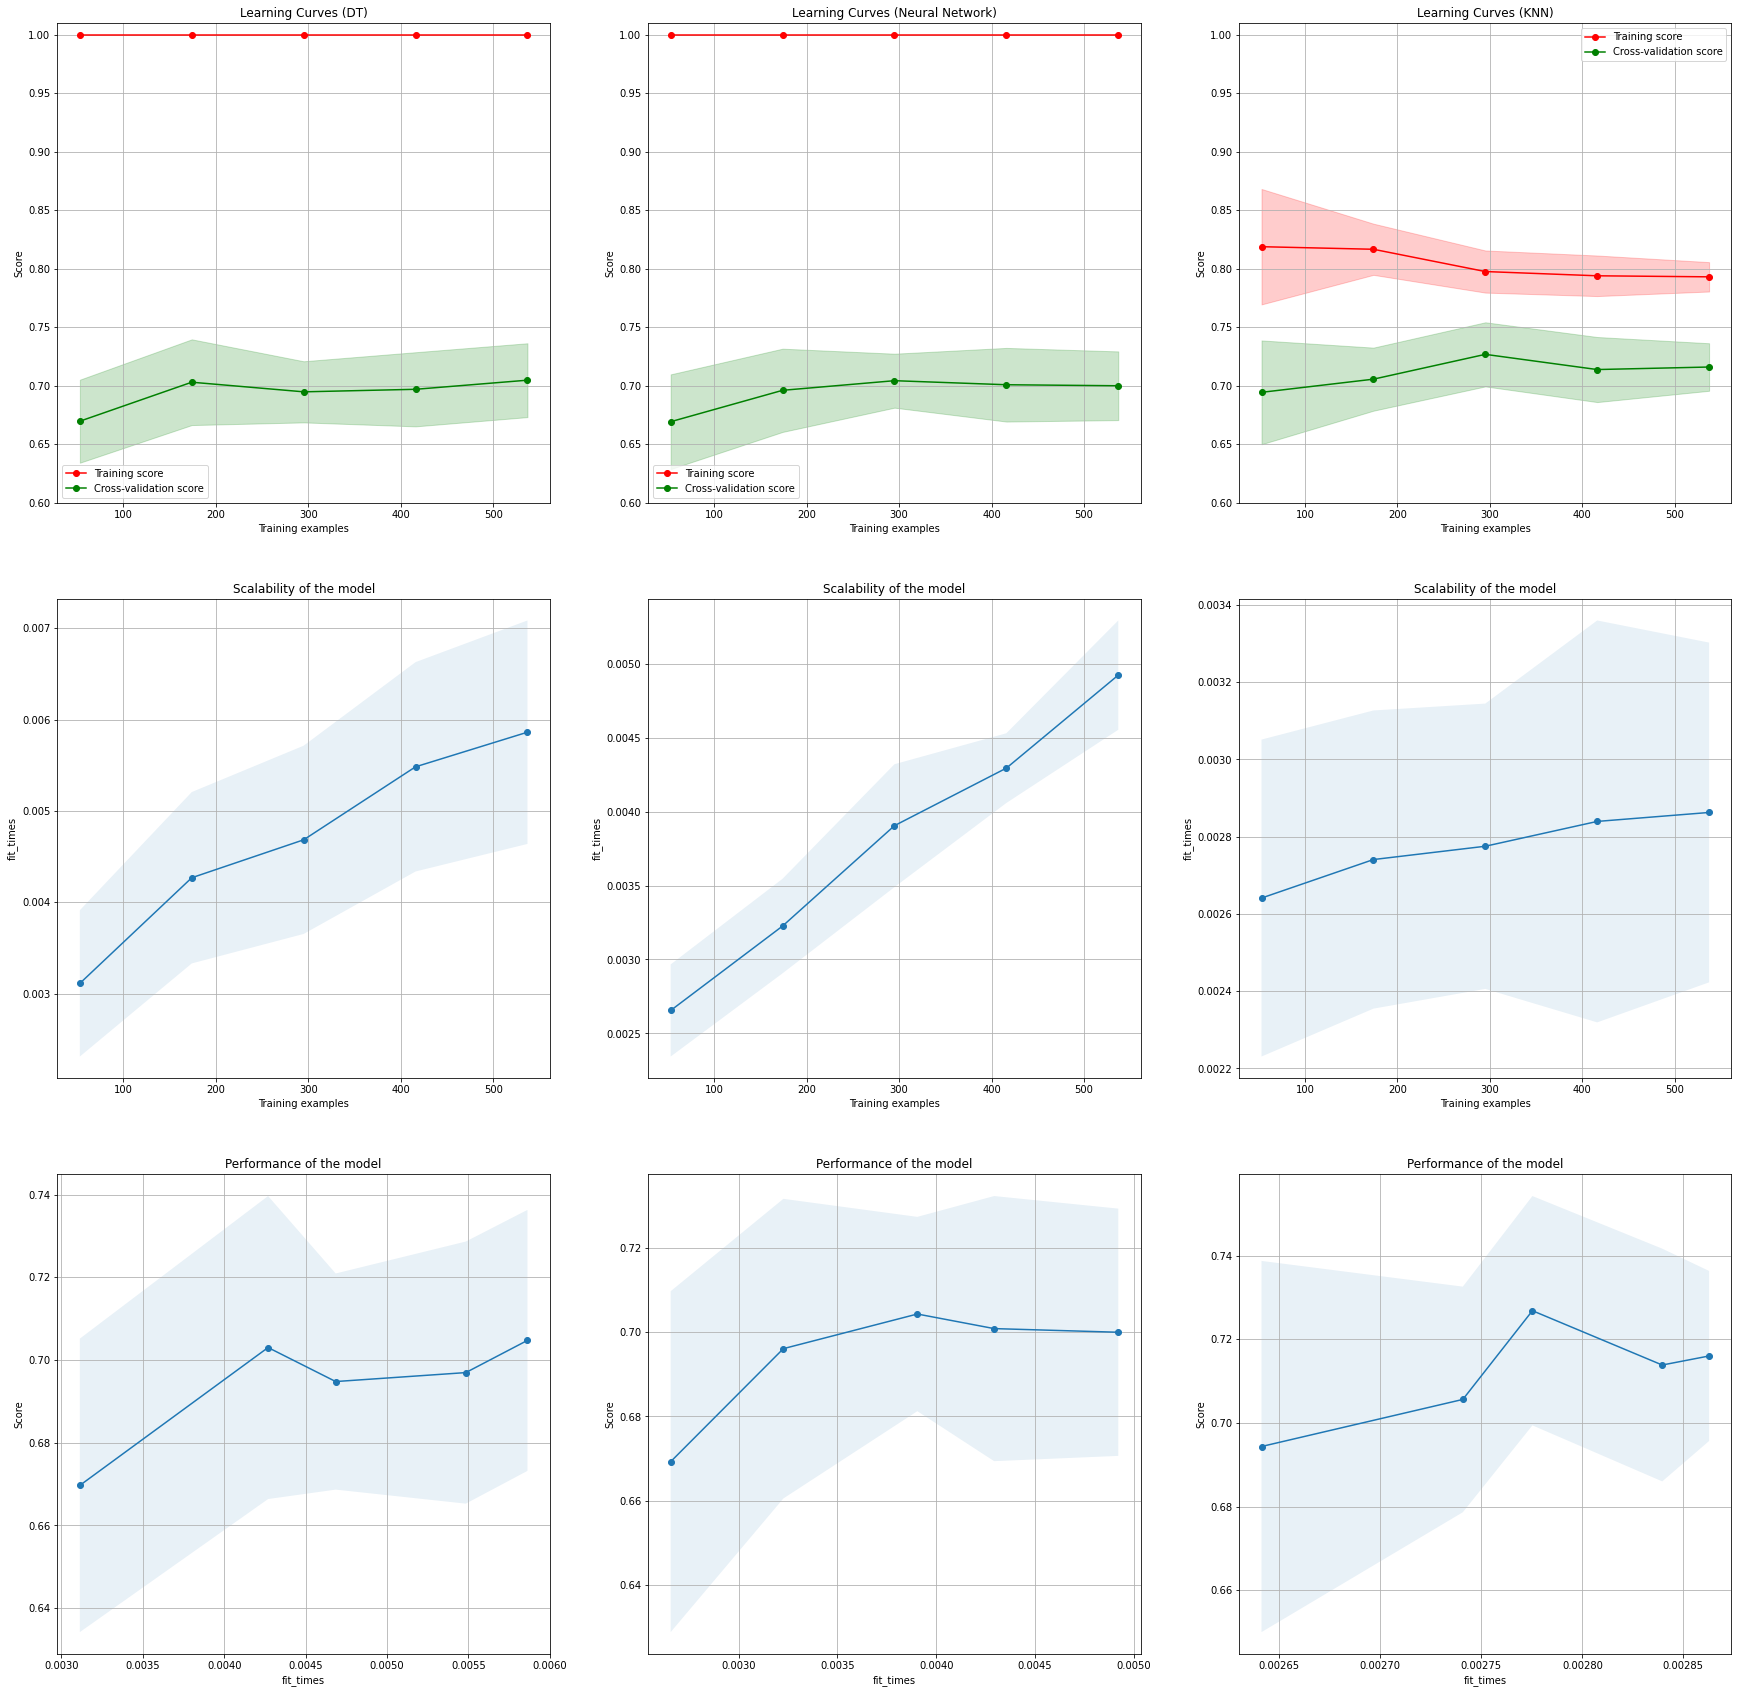

In [142]:

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 10))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.2,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.2,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    
    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    
    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 3, figsize=(30, 30))

title = "Learning Curves (DT)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 30% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
estimator = DecisionTreeClassifier(criterion='entropy')
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.6, 1.01),
                    cv=cv, n_jobs=4)

title = "Learning Curves (Neural Network)"
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
MLPClassifier(solver = 'sgd', hidden_layer_sizes=(100,),random_state=42, activation = 'logistic', max_iter=500)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.6, 1.01),
                    cv=cv, n_jobs=4)


title = "Learning Curves (KNN)"
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)

estimator = KNN()
plot_learning_curve(estimator, title, X, y, axes=axes[:, 2], ylim=(0.6, 1.01),
                    cv=cv, n_jobs=4)


plt.show()

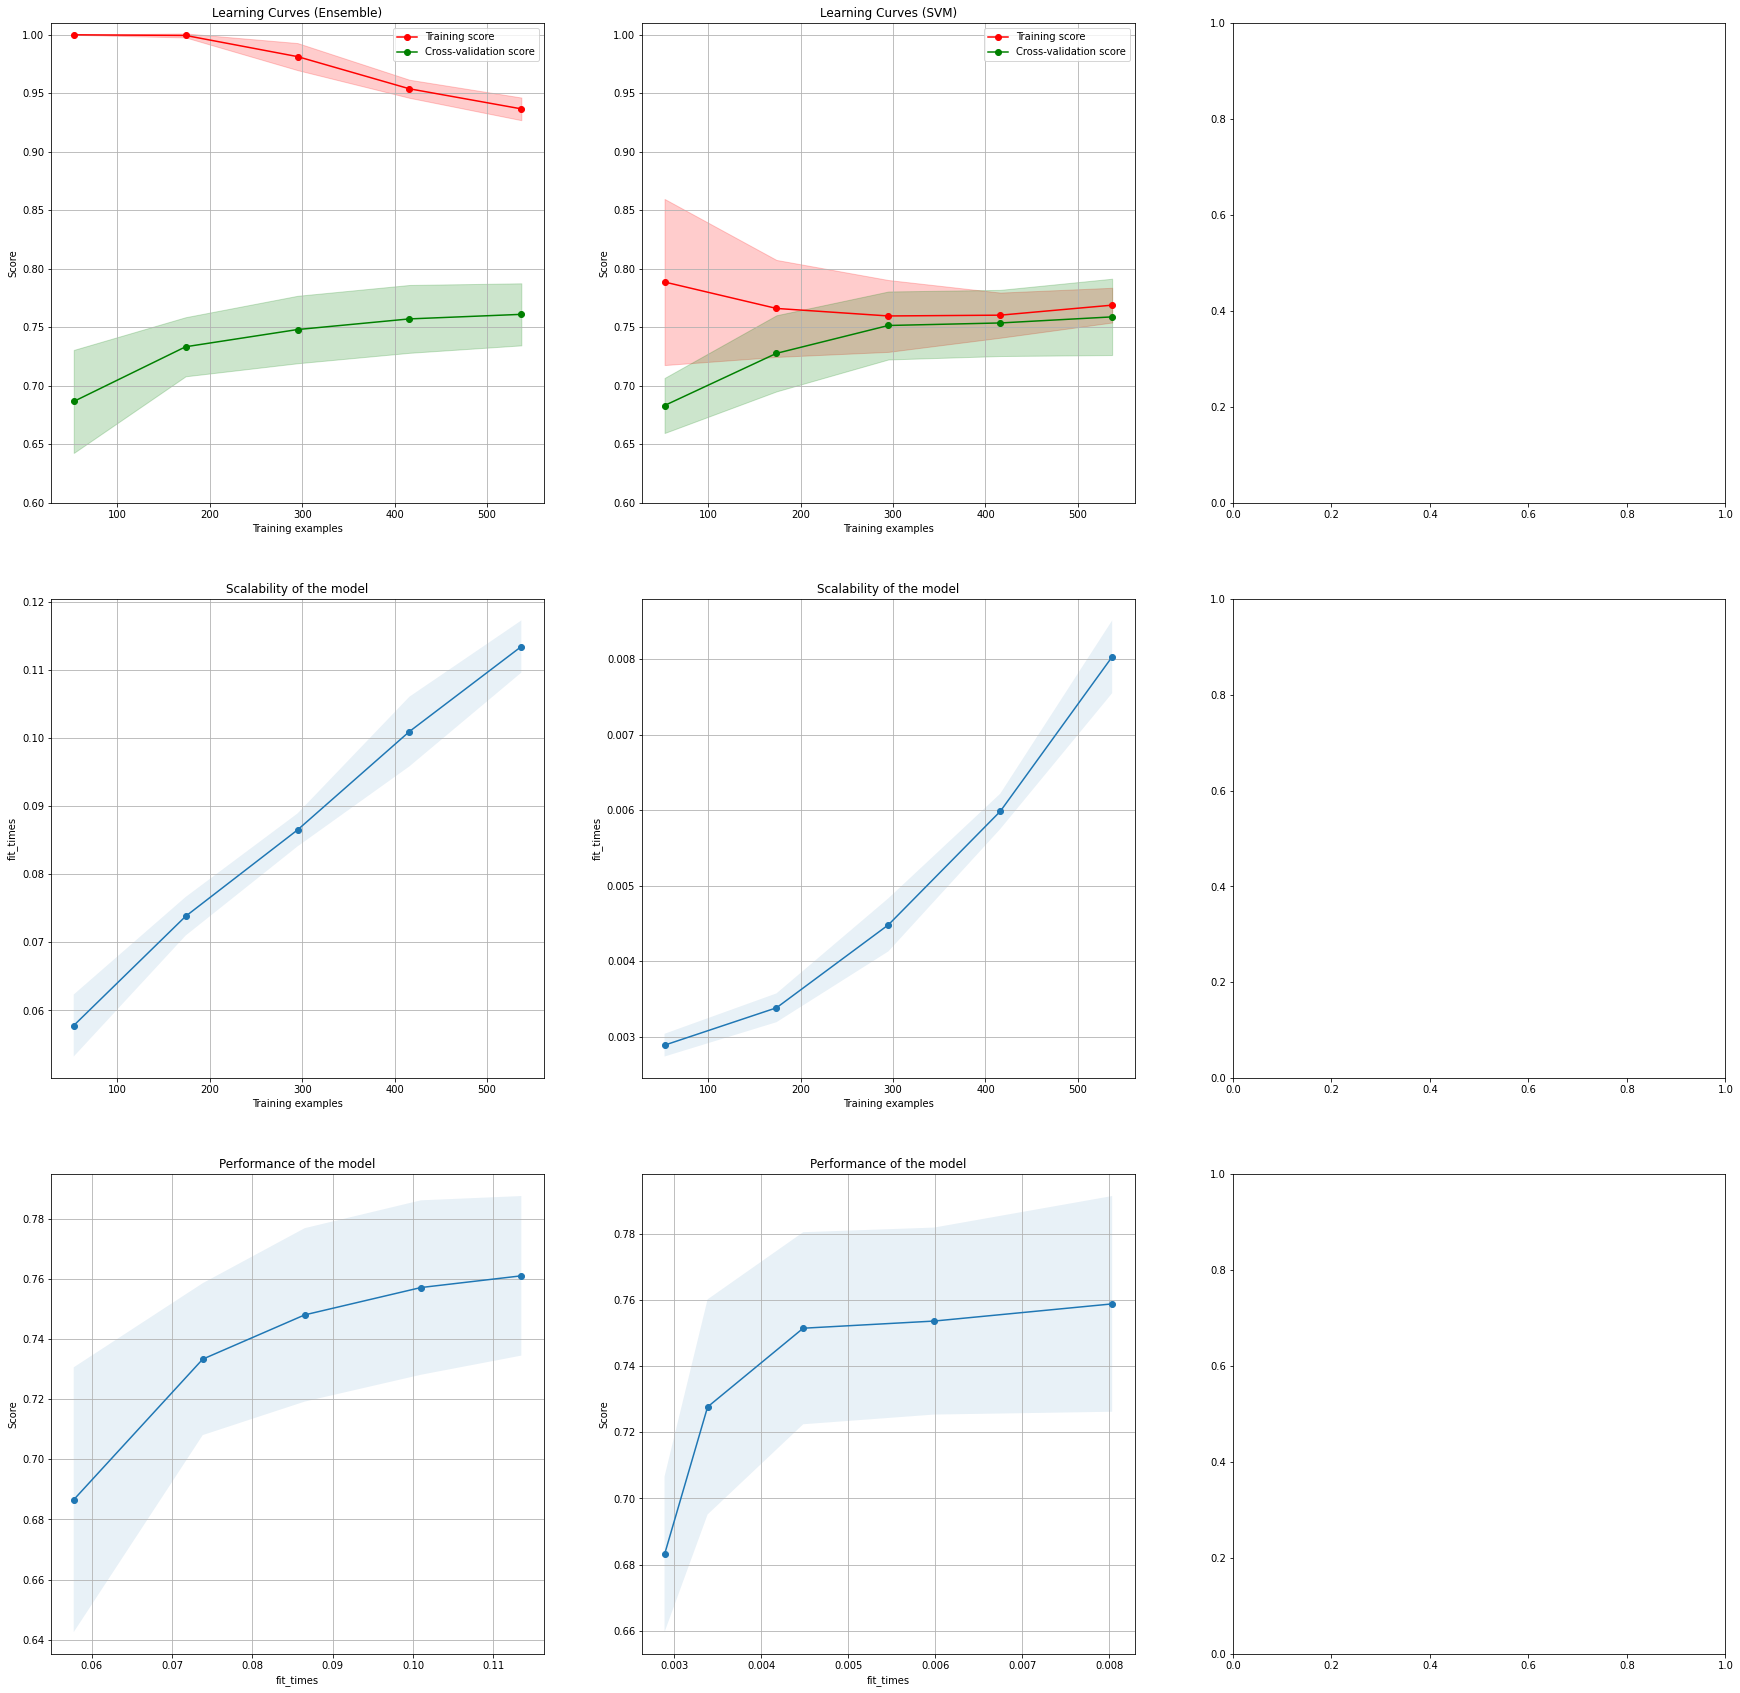

In [143]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 10))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.2,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.2,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    
    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    
    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3,3, figsize=(30, 30))


title = "Learning Curves (Ensemble)"
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
estimator = GradientBoostingClassifier(random_state=7, learning_rate = 0.1)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.6, 1.01),
                    cv=cv, n_jobs=4)



title = "Learning Curves (SVM)"
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)

estimator = SVC(kernel='rbf',random_state=42)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.6, 1.01),
                    cv=cv, n_jobs=4)



plt.show()

In [109]:
######### Result update ###########

